<h1>Summary</h1>

<h3>OLS : Ordinary Least Squares</h3>
OLS（ただの線形回帰）は、データセットが多くの特徴量を持つ場合は、過剰適合の可能性が高くなる<br>
LinearRegressionは内部で正規方程式（損失関数を最小にするパラメータ$\theta$を求める方程式）を解いている。ただし、疑似逆行列（ムーア・ペンローズの逆行列）を用いて近似的に算出している。疑似逆行列は特異値分解（SVD）という行列の標準的な分解テクニックを用いて算出可能。<br>

損失関数（平均二乗誤差：mean square error）：$MSE(X, h_\theta)=\frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)} )^2$

<h3>Ridge</h3>
Ridge回帰は最小二乗法を行いつつ、係数の絶対値の大きさを可能な限り小さくするように（個々の特徴量が出力に与える影響をなるべく小さくするように）制約される（L2正則化）<br>
正則化とは、過剰適合を防ぐために明示的にモデルを制約することである<br>
RidgeもLinearRegressionと同様には内部で正規方程式（損失関数を最小にするパラメータ$\theta$を求める方程式）を解いている。Andre-Louis Choleskyの行列分解テクニックを用いている？<br>

損失関数：$J(\theta)=MSE(\theta) + \alpha\frac{1}{2} \sum_{i=1}^{n} {\theta_i}^2$

<h4>重要なパラメータ</h4>
alpha（デフォルトは1.0）<br>
alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=Linear Regressionと同じような挙動になる）

<h3>Lasso</h3>
Lasso回帰は、Ridge回帰と同様に、係数が0になるように制約をかけるが、その結果いくつかの係数が完全に0になる（L1正則化）<br>
これはモデルにおいていくつかの特徴量が完全に無視される（自動的に特徴量が選択される）ことを意味し、どの特徴量が重要なのかが明らかとなり、モデルを解釈しやすくなる<br>

損失関数：$J(\theta)=MSE(\theta) + \alpha\sum_{i=1}^{n} |\theta_i|$

<h4>重要なパラメータ</h4>
alpha（デフォルトは1.0）<br>
alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=Linear Regressionと同じような挙動になる）

<h3>Elastic Net</h3>
Elastic Netは、Ridge回帰とLasso回帰の中間である。正則化項（損失関数の$\alpha$が関連する部分）はRidge回帰とLasso回帰の正則化項を混ぜ合わせたもので、混ぜ方は割合rで変えられる。Elastic Netは、r=0のときにはRidge回帰と等しく、r=1のときにはLasso回帰と等しい<br>
ほとんどすべての場合、何らかの正則化をすべきなので、一般にプレーンな線形回帰は避けた方がよい。Ridgeはよいデフォルトになるが、意味がある特徴量は一部だけなのではないかと疑われるときには、役に立たない特徴量の重みを0に引き下げてくれるLassoやElastic Netを使った方がよい。そして、Lassoは訓練インスタンスの数よりも特徴量の数の方が多いときや、複数の特徴量の間に強い相関があるときに不規則な動きを示すことがあるので、一般にLassoよりもElastic Netの方がよい<br>

損失関数：$J(\theta)=MSE(\theta) + r\alpha\sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} {\theta_i}^2$

<h4>重要なパラメータ</h4>
・alpha（デフォルトは1.0）<br>
alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=Linear Regressionと同じような挙動になる）<br>
・l1_ratio（=ミックスの割合r）<br>
l1_ratio=0のときにはRidge回帰と等しく、l1_ratio=1のときにはLasso回帰と等しい

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h1>OLS : Ordinary Least Squares</h1>

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [4]:
# 係数と切片
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
lr.intercept_: 36.933255457118975


In [5]:
# 決定係数
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.77
Test set score: 0.64


In [6]:
# 以下では特徴量間の積（交互作用）も含んだ、拡張されたbostonデータを用いる
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

(506, 104)


In [7]:
# 決定係数
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.61


<h1>Ridge</h1>

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge = Ridge().fit(X_train, y_train)
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [10]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.79
Test set score: 0.64


In [11]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


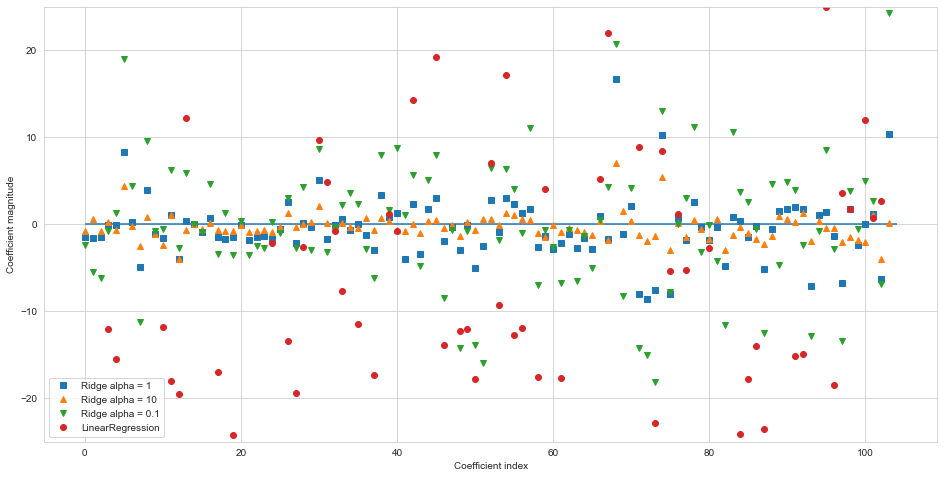

In [12]:
plt.figure(figsize = (16, 8))

plt.plot(ridge.coef_, "s", label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, "^", label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, "v", label = "Ridge alpha = 0.1")
plt.plot(lr.coef_, "o", label = "LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

<h1>Lasso</h1>

In [13]:
from sklearn.linear_model import Lasso

In [14]:
lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")

Training set score: 0.29
Test set score: 0.21


In [15]:
# 使用された特徴量の数
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 4


In [16]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")

Training set score: 0.90
Test set score: 0.77


In [17]:
# 使用された特徴量の数
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Number of features used: 33


In [18]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.64


In [19]:
# 使用された特徴量の数
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

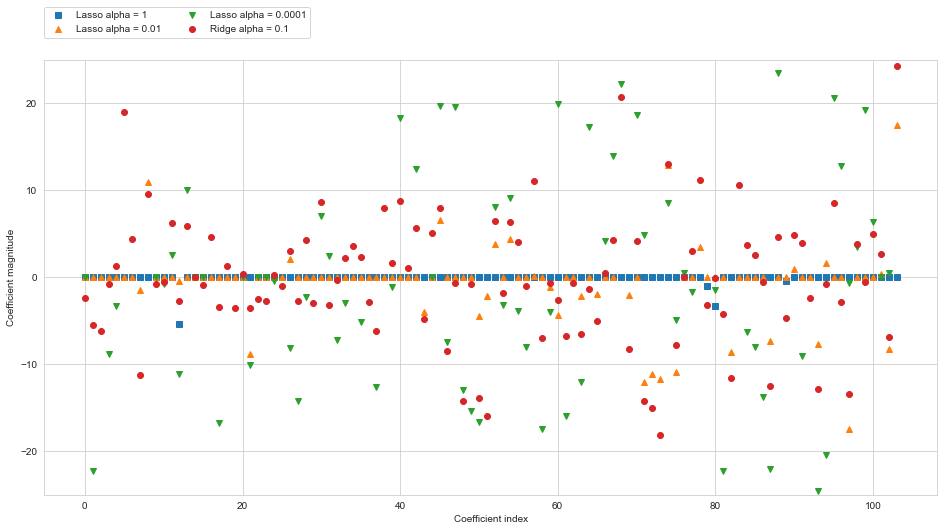

In [20]:
plt.figure(figsize = (16, 8))

plt.plot(lasso.coef_, "s", label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, "^", label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label = "Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, "o", label = "Ridge alpha = 0.1")

plt.legend(ncol = 2, loc = (0,1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

<h1>Elastic Net</h1>

In [21]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5).fit(X_train, y_train)

# 決定係数
print(f"Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Test set score: {elastic_net.score(X_test, y_test):.2f}")

# 係数と切片
print(f"lr.coef_: {elastic_net.coef_}")
print(f"lr.intercept_: {elastic_net.intercept_}")

# 使用された特徴量の数
print(f"Number of features used: {np.sum(elastic_net.coef_ != 0)}")

Training set score: 0.72
Test set score: 0.55
lr.coef_: [-0.11668517  0.45449994 -0.69302345  0.4763029  -0.15742755  3.3411999
 -0.         -1.10302997  0.         -0.76577739 -2.44310046  0.81593634
 -3.68229623 -0.          0.         -0.          0.         -0.
 -0.         -0.04392692 -0.         -0.10634509 -0.01630692 -0.
 -0.         -0.          0.50142111 -0.          0.          0.
  1.13562036  0.         -0.          0.         -0.         -0.
  0.48554848 -0.         -0.          0.         -0.34775794 -0.
 -0.14234577 -0.         -0.         -0.         -0.31701609 -0.
 -1.19205178  0.47633391  0.          0.37008422  0.32658736  0.
  0.61580677  0.39282295  0.19323358  0.50531751 -0.         -0.76139625
  0.         -0.36275775 -0.         -0.         -0.34129909 -0.62737161
  0.         -1.36265017  5.18790002  0.98595118  0.         -0.
 -0.07349976 -0.07112614  4.45852598 -1.41867541 -0.         -0.20644641
 -0.         -0.29114617 -1.52639896  0.07396454 -2.80936476